In [2]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('Train.csv', encoding='utf8', header=0)
testA_df = pd.read_csv('Test_A.csv', encoding='utf8', header=0)
train_df

,ID,Elements,News
0,TR000001,零壹智库|150份报告！把脉保险数字化及保险科技创新与发展[SEP]科技#大数据#人工智能#...,科技与金融的融合正在加速。以大数据、人工智能、生物科技、区块链、物联网等为代表的技术不断成熟...
1,TR000002,明晚直播|保险科技企业服务专题：保险营销服务赛道的机会与挑战[SEP]保险科技市场#企业服务...,保险科技市场上，企业服务赛道正在成为新的主角：统计过去一年多的保险科技投融资案例，半数以上的...
2,TR000003,专访熊猫保险科技创始人王刚：碎片化场景与精细化营销是保险科技新趋势[SEP]熊猫保险科技创始...,日前，熊猫保险科技创始人、CEO王刚出席2021保险科技创新发展论坛暨保险科技管理人年会，并...
3,TR000004,熊猫保险科技出席2021保险科技创新发展论坛[SEP]4月16#王刚发表#费改后市场#趋势#...,（4月16日讯）今日，熊猫保险科技受邀参加2021保险科技创新发展论坛暨保险科技管理人年会。...
4,TR000005,匠心深耕+科技驱动，众安引领保险科技行业新格局[SEP]新冠疫情#行业带来#冲击#促使#互联...,去年，新冠疫情的袭来，给各行业带来巨大冲击，促使各行业加速洗牌。后疫情时代更是让处于下半场的...
...,...,...,...
160326,TR160327,蓝黛科技：简式权益变动报告书[SEP]蓝黛科技#黛股权投资基金合伙企业#大道50号9#4通讯...,蓝黛科技集团股份有限公司简式权益变动报告书上市公司名称:蓝黛科技集团股份有限公司股票上市地点...
160327,TR160328,供应链金融痛点及区块链解决方案都在这里了！[SEP]人民#区块链作者#长春#中国人民银行数字...,来源：人民创投区块链作者：穆长春，中国人民银行支付结算司副司长；狄刚，中国人民银行数字货币研...
160328,TR160329,名校来了｜北工商嘉华学院：立足北京城市副中心2021年新增五个专业[SEP]看点#邀请#做客...,看点：在2021年高考即将到来之际，我们邀请了全国数十所高校“发言人”做客搜狐教育“名校来了...
160329,TR160330,浙江省金融业发展“十四五”规划发布（全文）[SEP]消息#浙江省政府发布#浙江省金融业发展#...,【大河财立方消息】近日，浙江省政府发布《浙江省金融业发展“十四五”规划》。《规划》提出加快打...


In [2]:
testA_df

,ID,Elements
0,TA0001,统计局：7月份，制造业采购经理指数(PMI)为49.0%[SEP]国家统计局网站31日消息#...
1,TA0002,统计局：7月份制造业采购经理指数为49.0%[SEP]统计局#月份制造业采购经理指数#49....
2,TA0003,货币政策这十年：管好总闸门的勇气与探索[SEP]作者#杨志#图虫时间回到10#飞速增长#中国...
3,TA0004,央行：通过结构性货币政策工具等多种政策引导金融机构精准支持重点领域[SEP]中国人民银行有关...
4,TA0005,7月份中国采购经理指数公布：新动能保持上升势头就业保持相对稳定[SEP]股市#投资#决策#来...
...,...,...
1204,TA1205,【开业】和研科技·苏州公司隆重开业，凝芯聚力，芯启征程！小米自研电池管理芯片背后：国内电源管...
1205,TA1206,“国云”的使命与前路[SEP]原标题#国云#揭开面纱#举办#第五届数字中国建设峰会#国云#大...
1206,TA1207,联想集团首次公布工业智慧节能解决方案搬走能源高损耗“拦路虎”[SEP]碳达峰#作为#碳排放大...
1207,TA1208,新业态催生的这些新职业，看看有没有适合你的？[SEP]人民#孕育#三类别共18个#职业#业态...


# 训练集长度分布

C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>, 401, 1, 325.0, 321.79077658094815)

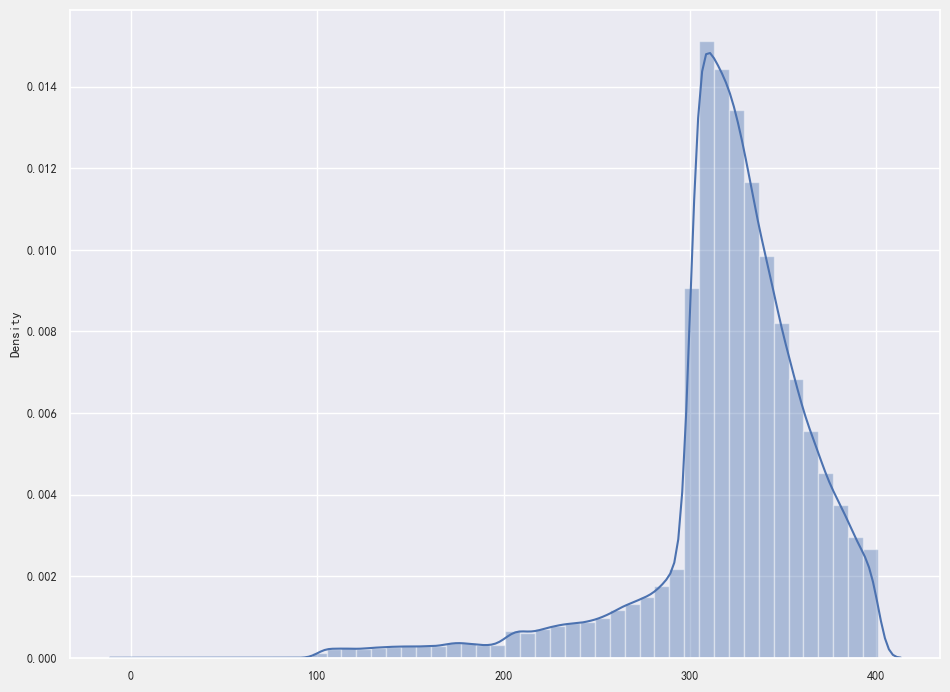

In [3]:
news = np.asarray(train_df['News']).transpose().tolist()
news_length = [len(n) for n in news]

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.set(font='SimHei', font_scale=0.8)  # 解决Seaborn中文显示问题并调整字体大小
sns.distplot(news_length), max(news_length), min(news_length), np.median(news_length), np.mean(news_length)

C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>, 412, 19, 170.0, 170.5580081207003)

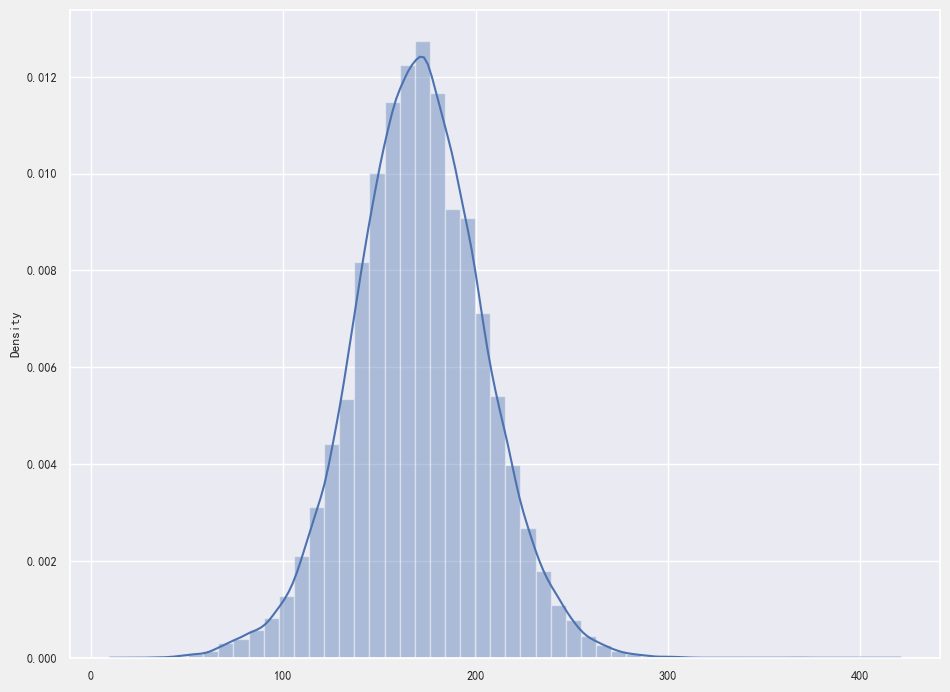

In [4]:
elements = np.asarray(train_df['Elements']).transpose().tolist()
elements_length = [len(e) for e in elements]

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.set(font='SimHei', font_scale=0.8)  # 解决Seaborn中文显示问题并调整字体大小
sns.distplot(elements_length), max(elements_length), min(elements_length), np.median(elements_length), np.mean(elements_length)

# 测试集长度分布

C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>, 292, 80, 168.0, 168.60380479735318)

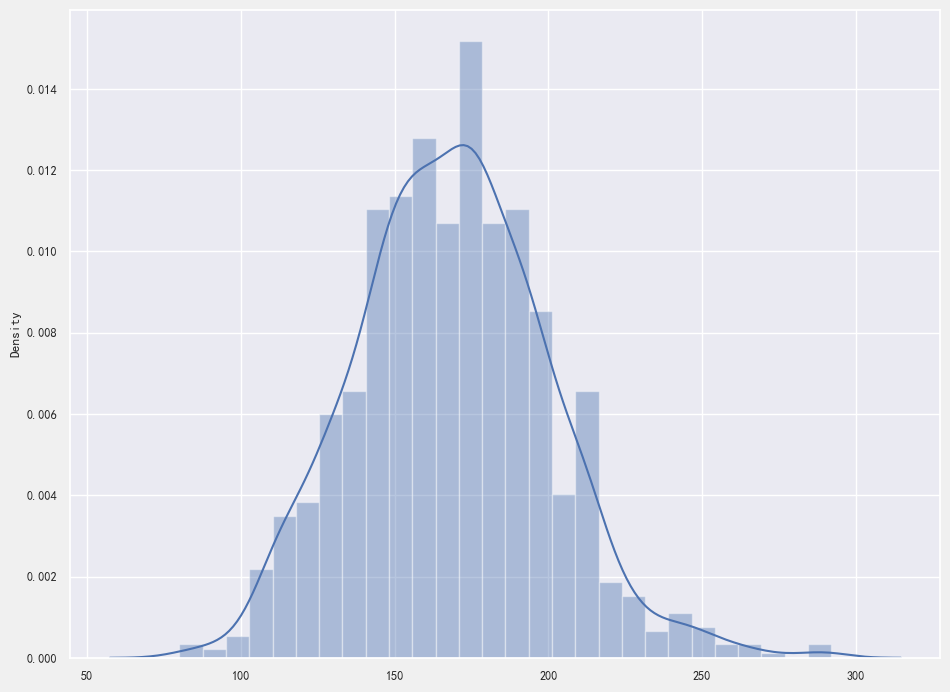

In [5]:
elements = np.asarray(testA_df['Elements']).transpose().tolist()
elements_length = [len(e) for e in elements]

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.set(font='SimHei', font_scale=0.8)  # 解决Seaborn中文显示问题并调整字体大小
sns.distplot(elements_length), max(elements_length), min(elements_length), np.median(elements_length), np.mean(elements_length)

In [3]:
import pandas as pd
import numpy as np

news = pd.read_csv('news.txt', encoding='utf8', header=None, names=['News'], sep='\t')
testA_df['News'] = news['News']
testA_df[['ID', 'News']].to_excel('results/result.xlsx', encoding='utf8', index=False)
testA_df

C:\Anaconda3\envs\pytorch39\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


,ID,Elements,News
0,TA0001,统计局：7月份，制造业采购经理指数(PMI)为49.0%[SEP]国家统计局网站31日消息#...,统计局：7月份，制造业采购经理指数(pmi)为49.0%国家统计局网站31日消息制造业采购经...
1,TA0002,统计局：7月份制造业采购经理指数为49.0%[SEP]统计局#月份制造业采购经理指数#49....,统计局：7月份制造业采购经理指数为49.0%统计局月份制造业采购经理指数49.0202207...
2,TA0003,货币政策这十年：管好总闸门的勇气与探索[SEP]作者#杨志#图虫时间回到10#飞速增长#中国...,货币政策这十年：管好总闸门的勇气与探索作者杨志图虫时间回到10飞速增长中国广义货币逼近百万亿...
3,TA0004,央行：通过结构性货币政策工具等多种政策引导金融机构精准支持重点领域[SEP]中国人民银行有关...,央行：通过结构性货币政策工具等多种政策引导金融机构精准支持重点领域中国人民银行有关司局负责人...
4,TA0005,7月份中国采购经理指数公布：新动能保持上升势头就业保持相对稳定[SEP]股市#投资#决策#来...,7月份中国采购经理指数公布：新动能保持上升势头就业保持相对稳定股市投资决策来a股参谋部超话聊...
...,...,...,...
1204,TA1205,【开业】和研科技·苏州公司隆重开业，凝芯聚力，芯启征程！小米自研电池管理芯片背后：国内电源管...,【开业】和研科技·苏州公司隆重开业，凝芯聚力，芯启征程！小米自研电池管理芯片背后：国内电源管...
1205,TA1206,“国云”的使命与前路[SEP]原标题#国云#揭开面纱#举办#第五届数字中国建设峰会#国云#大...,“国云”的使命与前路原标题国云揭开面纱举办第五届数字中国建设峰会国云大会主题铸国云点明国云国...
1206,TA1207,联想集团首次公布工业智慧节能解决方案搬走能源高损耗“拦路虎”[SEP]碳达峰#作为#碳排放大...,联想集团首次公布工业智慧节能解决方案搬走能源高损耗“拦路虎”碳达峰作为碳排放大户工业制造行业...
1207,TA1208,新业态催生的这些新职业，看看有没有适合你的？[SEP]人民#孕育#三类别共18个#职业#业态...,新业态催生的这些新职业，看看有没有适合你的？人民孕育三类别共18个职业业态民宿管家数字化解决...


In [13]:
from keytotext import pipeline
nlp = pipeline(task="k2t", model="google/mt5-small", tokenizer="google/mt5-small")
nlp(['社保养老金入不敷出', '源自', '养老金', '事影响', '还有', '需要知道'])
# nlp(['translate English to French: ', 'he', 'hamburger', 'restaurant'])

RuntimeError: CUDA out of memory. Tried to allocate 490.00 MiB (GPU 0; 6.00 GiB total capacity; 5.24 GiB already allocated; 0 bytes free; 5.36 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF